In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.patches as mpatches
import seaborn as sns

df = pd.read_csv(r"C:\Users\Sana\OneDrive\Desktop\creditcard.csv")

In [2]:
# Checking the proportion of distribution in 'Class' column
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [3]:
# Checking the class distribution
class_distribution = df['Class'].value_counts()
class_distribution

0    284315
1       492
Name: Class, dtype: int64

In [5]:
# Checking for missing values 

missing_values = df.isnull().sum()

missing_values_2 = missing_values.reset_index()
missing_values_2.columns = ['Features', 'Missing Values']

# Diving the table in two halves 

first = missing_values_2.iloc[:16]
second = missing_values_2.iloc[16:].reset_index(drop=True)

# Merging two halves side by side

new_table = pd.concat([first, second], axis=1)
new_table.columns = ['Features', 'Missing Values', 'Features', 'Missing Values']

new_table.fillna("", inplace=True)
new_table

,Features,Missing Values,Features,Missing Values
0,Time,0,V16,0.0
1,V1,0,V17,0.0
2,V2,0,V18,0.0
3,V3,0,V19,0.0
4,V4,0,V20,0.0
5,V5,0,V21,0.0
6,V6,0,V22,0.0
7,V7,0,V23,0.0
8,V8,0,V24,0.0
9,V9,0,V25,0.0


In [6]:
# Checking for duplicated rows 

duplicated_rows = df.duplicated()

# Checking the number of duplicated rows that have Class = 1
        
duplicated_frauds = df[duplicated_rows & (df['Class'] == 1)]

print("Total Number of Duplicated Rows: ", duplicated_rows.sum())
print("Number of Duplicated Rows that are Fraudulent: ", duplicated_frauds.shape[0])


Total Number of Duplicated Rows:  1081
Number of Duplicated Rows that are Fraudulent:  19


## Class Distribution Bar Chart

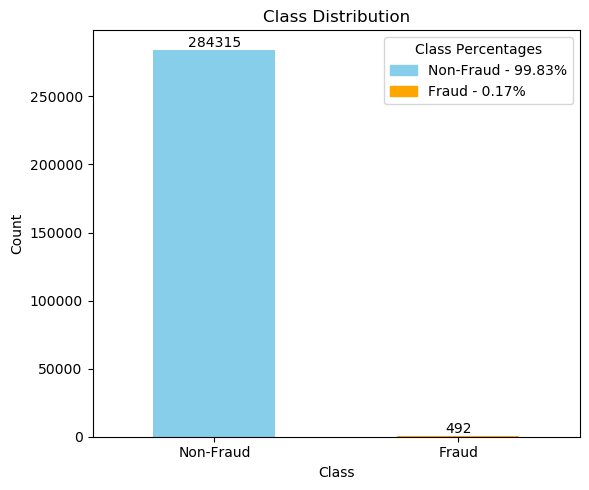

In [7]:
# Calculating the percenatge values 

total_samples = class_distribution.sum()
fraud_percentage = (class_distribution[1] / total_samples) * 100
non_fraud_percentage = (class_distribution[0] / total_samples) * 100

# We now map the class names to their respective counts and percentage using a dictionary

class_counts = {"Non-Fraud": class_distribution[0], "Fraud": class_distribution[1]}
class_percentage = {"Non-Fraud": non_fraud_percentage, "Fraud": fraud_percentage}

# Colors for each class in the bar chart  
colors = ['skyblue','orange']

# Plotting class distribution 

plt.figure(figsize=(6,5))
ax = class_distribution.plot(kind='bar',color=colors)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xticks(rotation=0)

# Displaying counts on top of each bar 
for index, value in enumerate(class_distribution):
    plt.text(index, value + 10, str(value), ha = 'center', va = 'bottom')

# Creating custom legends and labels for each class with coloured boxes
custom_legend = [mpatches.Patch(color = colors[i], label = f'{class_name} - {class_percentage[class_name]:.2f}%')
         for i, class_name in enumerate(class_counts.keys())]

# Placing the cutom legend on upper right  
plt.legend(handles=custom_legend, title = 'Class Percentages', loc = 'upper right')

plt.tight_layout()
plt.show()


## Correlation Matrix

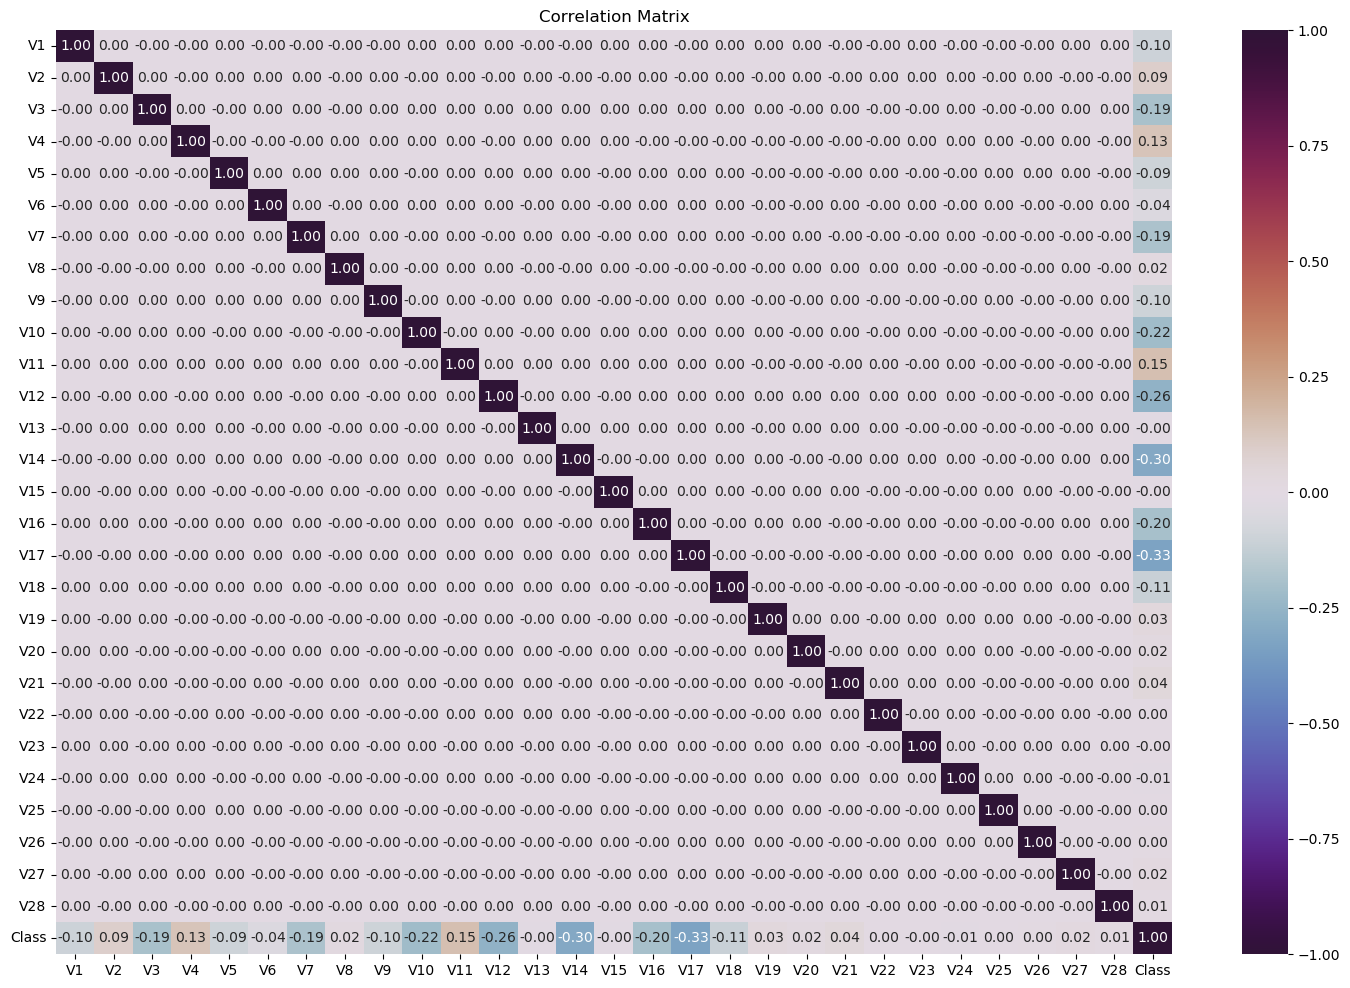

In [8]:
# We drop the "Time" and "Amount" columns
data_corr = df.drop(['Time','Amount'], axis = 1)

# Correlation matrix
corr_matrix = data_corr.corr()

plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, cmap='twilight_shifted', vmin= -1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## "Amount" Feature Visualization

We create a new column "Amount_bin" to indicate which bin range each transaction falls in.  

In [9]:
bin_ranges = [(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500)]

df['Amount_bin'] = pd.cut(df['Amount'], bins=[br[0] for br in bin_ranges] + [bin_ranges[-1][1]])

# Group by Amount_bin and Class and computing the count for each combination

bin_class_count = df.groupby(['Amount_bin', 'Class']).size().unstack(fill_value=0)

# Calculate the percentage of fraudulent transactions for each bin 
bin_class_count['Fraud_Percenatge'] = (bin_class_count[1] / (bin_class_count[0] + bin_class_count[1])) * 100

# Reset column names for clarity 
bin_class_count.columns = ['Non-Fraudulent', 'Fraudulent', 'Fraud_Percentage']

bin_class_count.reset_index()


,Amount_bin,Non-Fraudulent,Fraudulent,Fraud_Percentage
0,"(0, 500]",273410,430,0.157026
1,"(500, 1000]",6176,26,0.419220
2,"(1000, 1500]",1600,6,0.373599
3,"(1500, 2000]",656,2,0.303951
4,"(2000, 2500]",235,1,0.423729


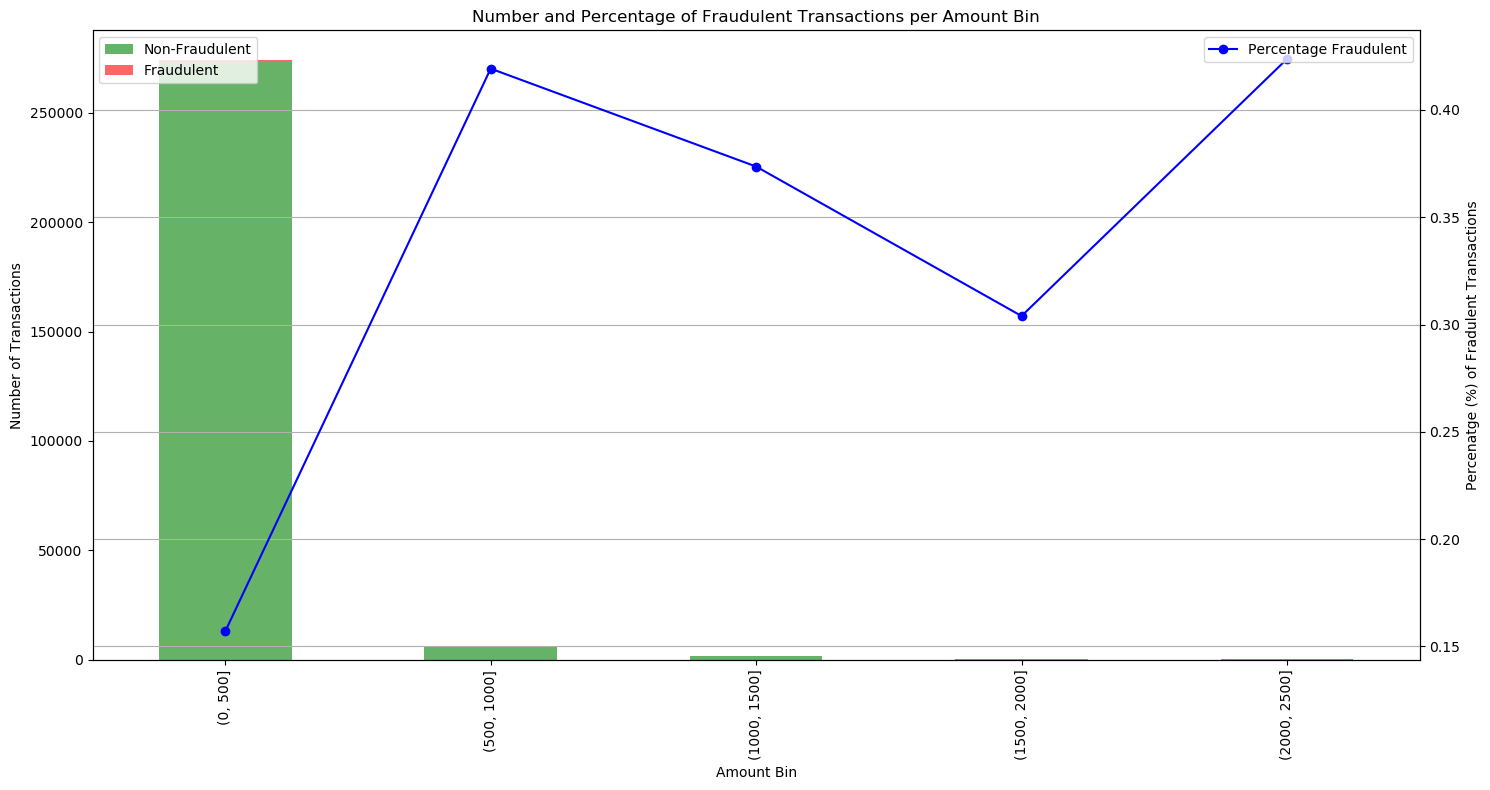

In [10]:
fig, ax1 = plt.subplots(figsize = (15, 8))

# Bar plot for number of transactions
bin_class_count[['Non-Fraudulent', 'Fraudulent']].plot(kind='bar', ax=ax1, color=['green','red'], alpha=0.6, stacked=True)
ax1.set_ylabel('Number of Transactions')
ax1.set_xlabel('Amount Bin')
ax1.set_title('Number and Percentage of Fraudulent Transactions per Amount Bin')
ax1.legend(loc='upper left')

# Secondary Y-Axis for percentages
ax2 = ax1.twinx()
bin_class_count['Fraud_Percentage'].plot(kind='line', ax=ax2, color='blue', marker='o', label='Percentage Fraudulent')
ax2.set_ylabel('Percenatge (%) of Fradulent Transactions')

# Adjusting the grid, legend, and layout
ax2.legend(loc='upper right')
ax2.grid(None)

plt.tight_layout()
plt.show()

## "Time" Feature Visualization

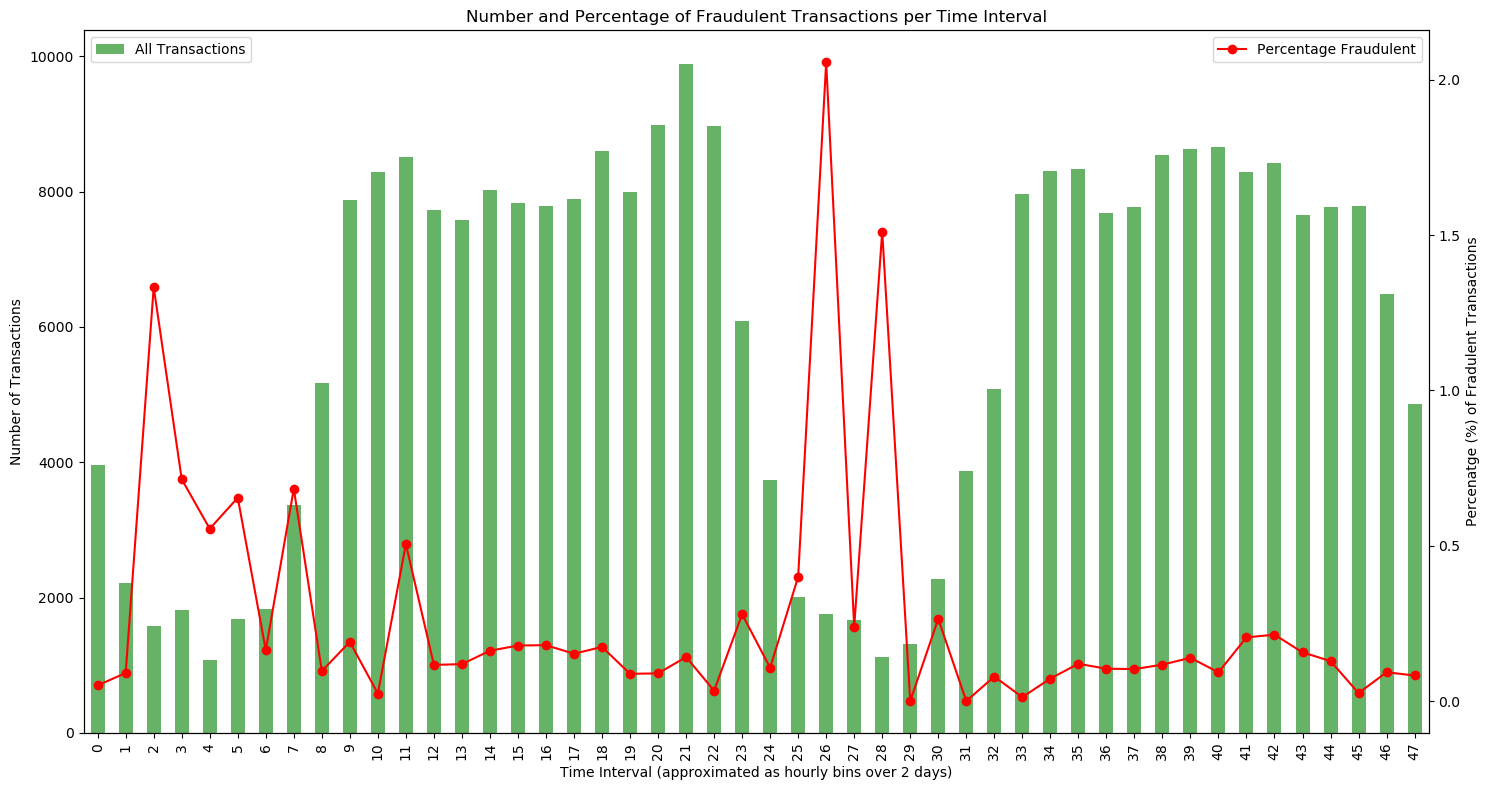

In [11]:
df['Time_bin'] = pd.cut(df['Time'], bins=48, labels=False)

# Group by Time_bin and Class and computing the count for each combination
time_class_count = df.groupby(['Time_bin', 'Class']).size().unstack(fill_value=0)

# Calculating the percentage of fraudulent transactions for each bin 
time_class_count['Fraud_Percentage'] = (time_class_count[1] / (time_class_count[0] + time_class_count[1])) * 100

fig, ax1 = plt.subplots(figsize=(15, 8))

# Histograms for all the transactions
time_class_count[[0, 1]].sum(axis=1).plot(kind='bar', ax=ax1, color='green', alpha=0.6)
ax1.set_ylabel('Number of Transactions')
ax1.set_xlabel('Time Interval (approximated as hourly bins over 2 days)')
ax1.set_title('Number and Percentage of Fraudulent Transactions per Time Interval')
ax1.legend(['All Transactions'], loc='upper left')

# Secondary Y-axis for percentages
ax2 = ax1.twinx()
time_class_count['Fraud_Percentage'].plot(kind='line', ax=ax2, color='red', marker='o', label='Percentage Fraudulent')
ax2.set_ylabel('Percenatge (%) of Fradulent Transactions')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Outlier Detection

Since PCA has been applied, some features may have outliers. We can visualize the distribution of features to identify potential outliers.

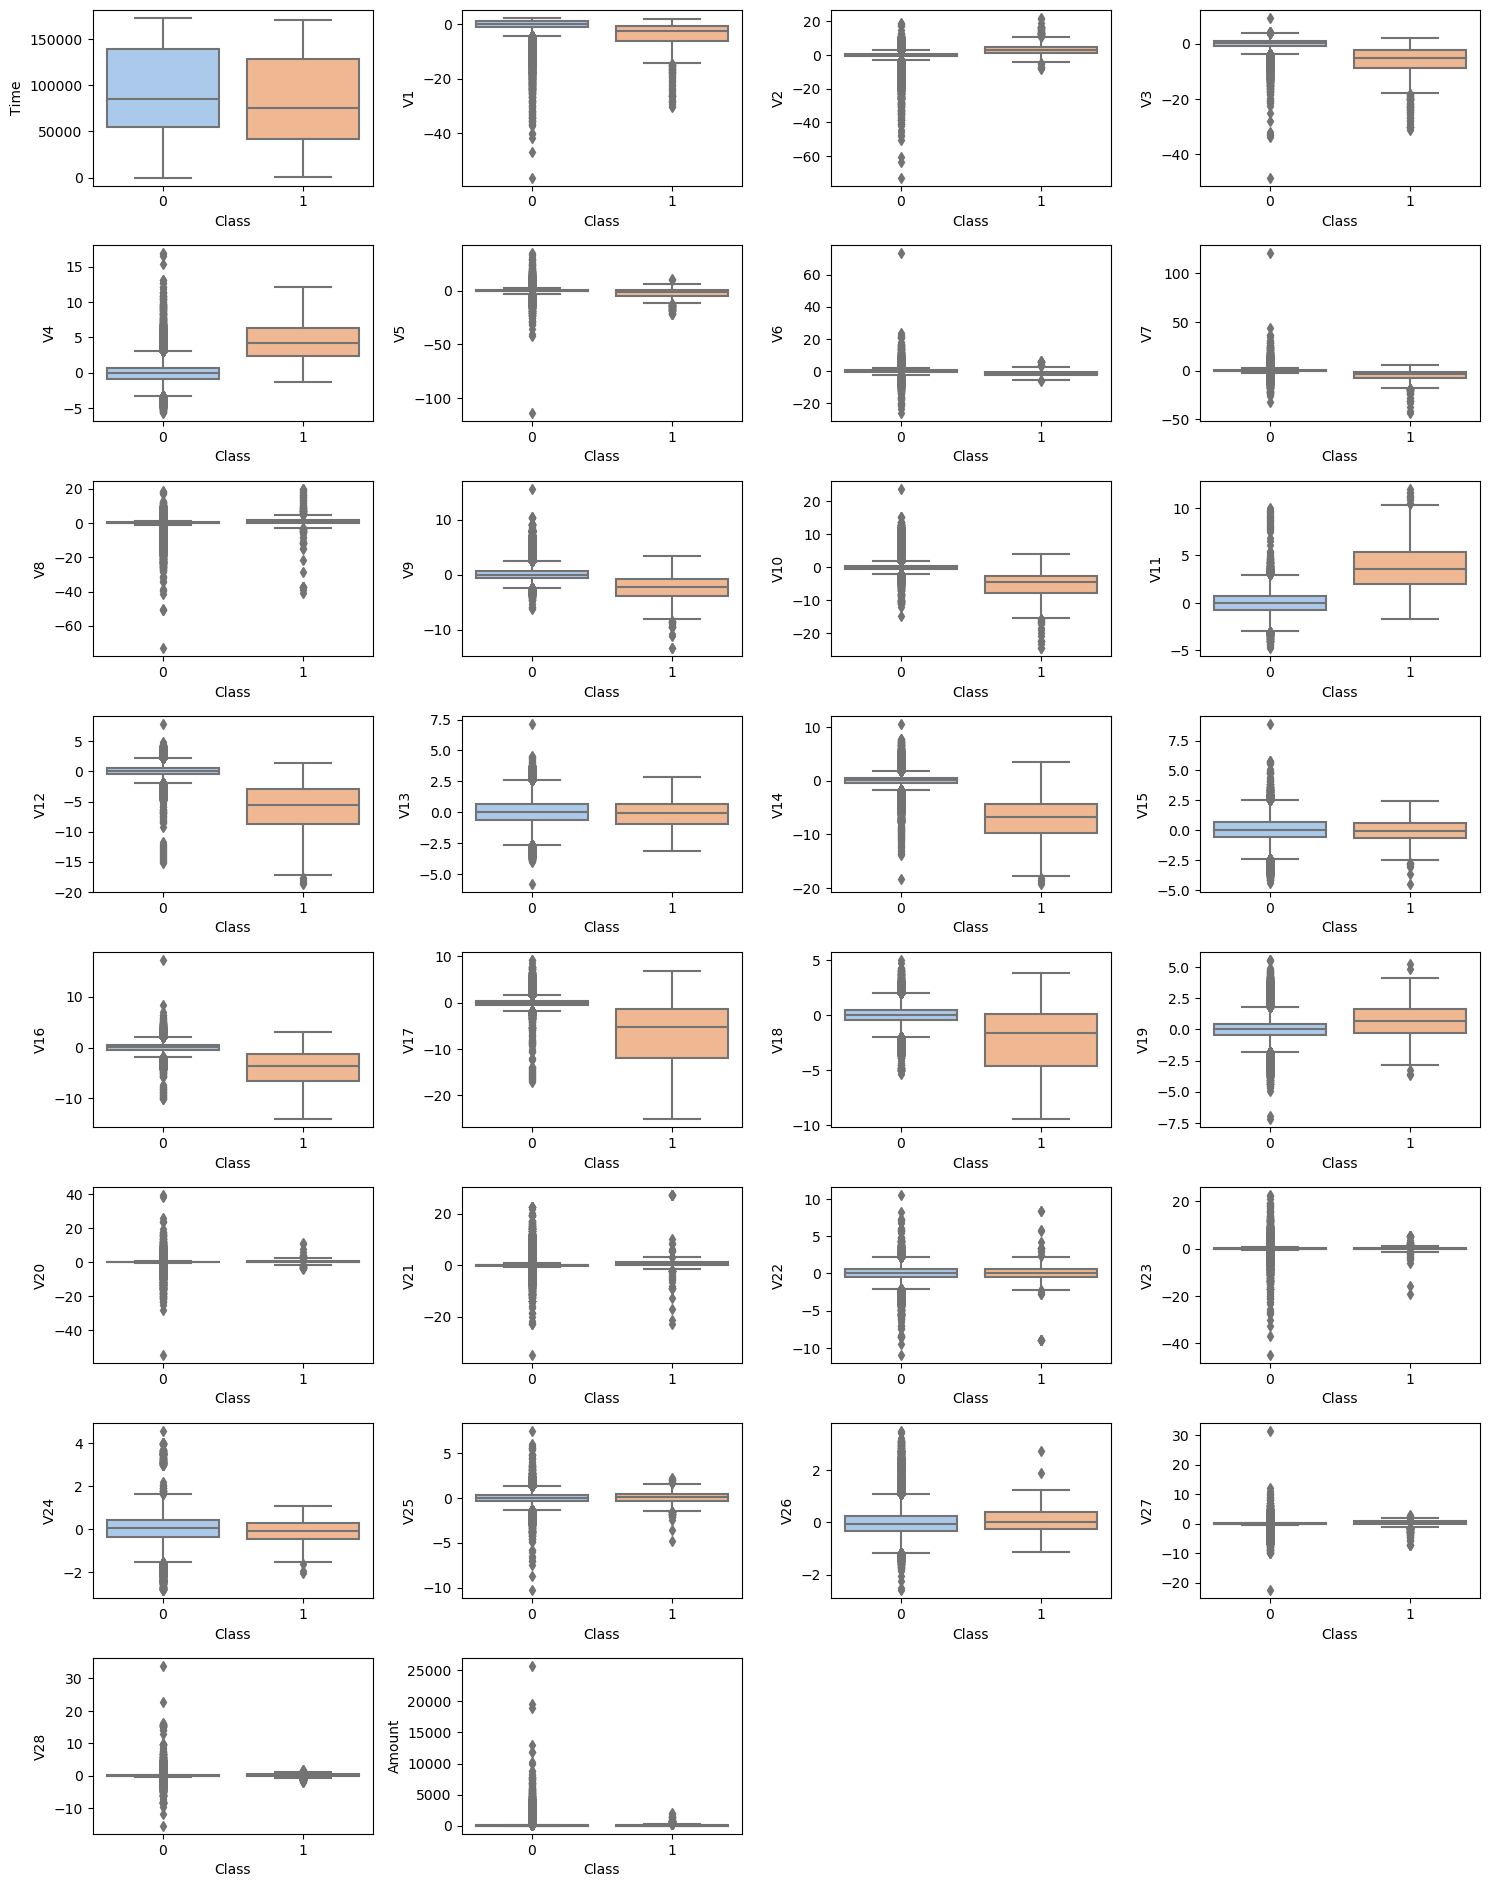

In [4]:
plt.figure(figsize=(15, 19))
for i, column in enumerate(df.drop(['Class'], axis=1).columns):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(data=df, y=column, x='Class', showfliers=True, palette='pastel')
    plt.xlabel('Class')
    plt.ylabel(column)
plt.tight_layout()
plt.show()